In [1]:
from genre_classification.paths import get_path_experiment
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
EXPERIMENT_NAME = 'new_model_dropout0'
SET = 'train'

In [3]:
path_df_embeddings = get_path_experiment(EXPERIMENT_NAME, file_type=f'df_embeddings_{SET}')
path_df_genres = get_path_experiment(EXPERIMENT_NAME, file_type=f'df_genres_{SET}')

In [4]:
df_embeddings = pd.read_csv(path_df_embeddings, sep='\t', header=None)
df_genres = pd.read_csv(path_df_genres, sep='\t', index_col=0)

In [5]:
X = df_embeddings.to_numpy()
X_tsne = TSNE(init='pca', learning_rate='auto').fit_transform(X)

In [7]:
df_tsne = pd.DataFrame(X_tsne, columns=['dim_1', 'dim_2'])
df_tsne['genres'] = df_genres.values

<AxesSubplot:xlabel='dim_1', ylabel='dim_2'>

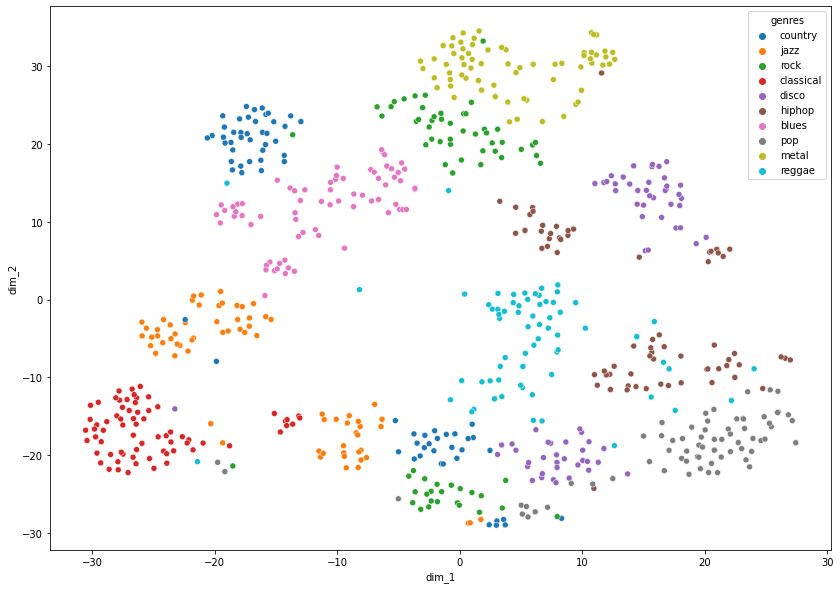

In [8]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.scatterplot(data=df_tsne, x='dim_1', y='dim_2', hue='genres', ax=ax)